In [3]:
import math
import time
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import sounddevice as sd
from glob import glob
import librosa
import librosa.display
import IPython.display as ipd
from pydub import AudioSegment
from itertools import cycle
sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

#Import zvukoveho suboru

audio_segment = AudioSegment.from_file("../git/sounds/rain.wav")

Importujeme potrebné knižnice, nastavíme štýl zobrazovania grafov a načítame zvukový súbor

In [4]:
if audio_segment.channels == 1 :
    
    x, Fs = librosa.load("../git/sounds/rain.wav") # cesta na .wav file
    Ts = 1/Fs
    N = len(x)
    M = N//2
    t = np.dot(np.arange(0, N-1) , Ts)
else: 
    warning(['Signal nie je monofonicky. Zvolte iny!'])


Kontrola monofónnosti a v prípade monofónneho signálu čítanie pomocou librosa a definovanie ďalších parametrov

In [5]:
p = np.linspace(-100,100,N) #iba párne čísla
P = np.array([p]).T

panNorm = (P/200) + 0.5

Vytvorenie poľa p s N hodnotami panorám (-100 až 100) konverzia poľa P na dvojrozmerné pole. Normalizácia poľa P.

In [6]:
gLeft = 1 - panNorm
gRight = panNorm 
GLeft = gLeft.flatten()
GRight = gRight.flatten()

leftChannel = np.multiply(GLeft, x)
rightChannel = np.multiply(GRight, x)


Kód vypočíta hodnoty zosilnenia pre ľavý a pravý kanál zvukového signálu na základe daného panoramatického usporiadania. Kód potom aplikuje tieto koeficienty na vstupný signál, aby vytvoril zosilnený zvukový signál pre ľavý a pravý kanál.

In [7]:
LeftChannel= leftChannel.flatten()
RightChannel= rightChannel.flatten()

Otvorenie polí leftChannel a rightChannel ich prevedením na jednorozmerné polia

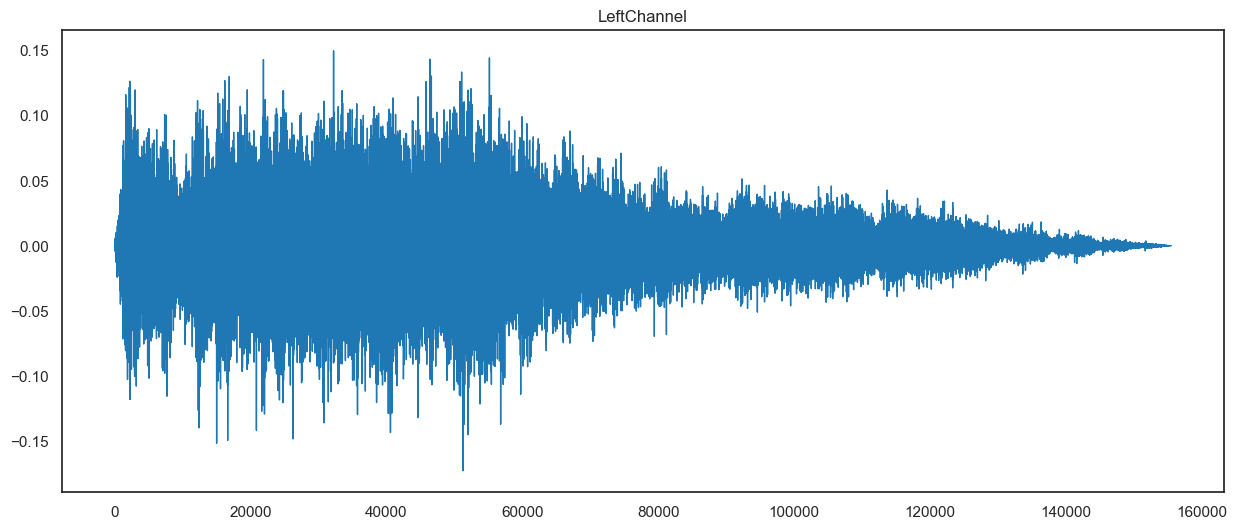

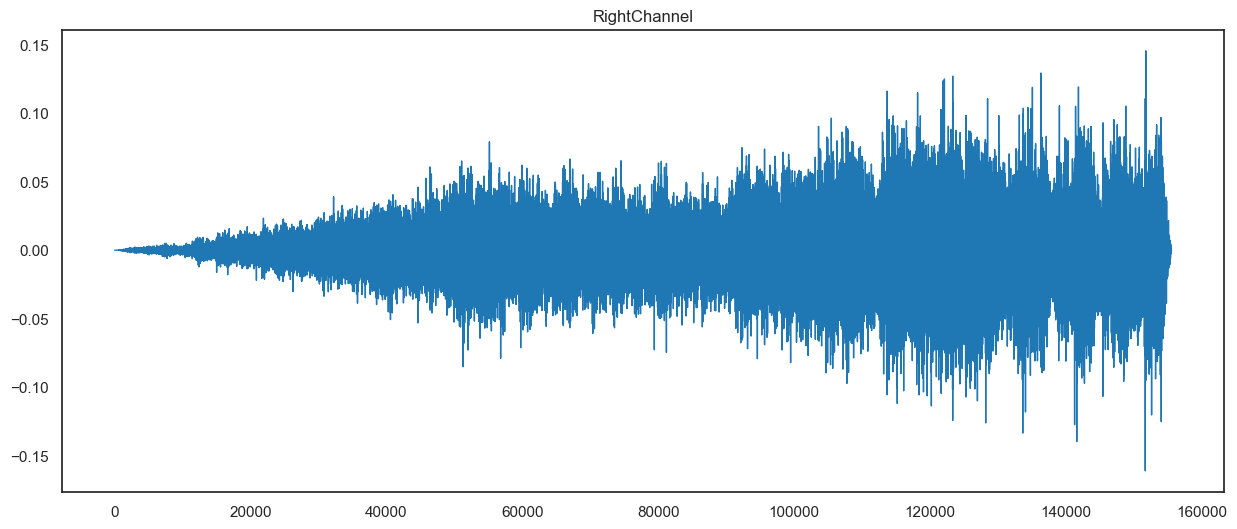

In [8]:
pd.Series(LeftChannel).plot(figsize=(15,6),
                  lw=1,
                  title='LeftChannel',
                  color=color_pal[0])
plt.show()
pd.Series(RightChannel).plot(figsize=(15,6),
                  lw=1,
                  title='RightChannel',
                  color=color_pal[0])
plt.show()

Tento kód otvorí zvukový súbor WAV a rozdelí ho na dva kanály, z ktorých každý dostane vlastnú panorámu. Výstupom sú dve zosilnené a filtrované polia.

In [9]:
#Nacitanie file a vypocet trvalosti audia
sound = AudioSegment.from_file("../git/sounds/rain.wav")
sound.duration_seconds == (len(sound) / 1000.0)
seconds_duration = round((sound.duration_seconds % 60),3)
                         
sd.play(LeftChannel, Fs)
time.sleep(seconds_duration + 1)
sd.play(RightChannel, Fs)